时间序列数据就是随着时间的变化收集的测量序列数据。这些数据是根据预定义的变量并在固定的间隔时间采集的。时间序列数据最主要
的特征就是其顺序是非常关键的。

## 将数据转换为时间序列格式


Start date = 1940-1
End date = 2016-1

Time series data:
 1940-01-31    98.96
1940-02-29    10.89
1940-03-31     6.22
1940-04-30    67.85
1940-05-31    31.70
1940-06-30    15.63
1940-07-31    76.17
1940-08-31    81.10
1940-09-30    87.24
1940-10-31    37.49
Freq: M, dtype: float64


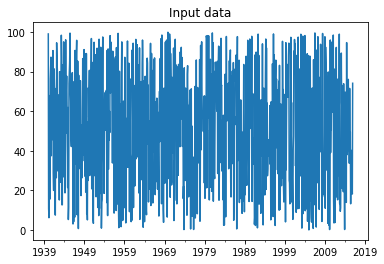

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义一个函数来读取文件，该文件将序列观察结果转换为时间序列数据
def convert_data_to_timeseries(input_file, column, verbose=False):
    data = np.loadtxt(input_file, delimiter=',')
    # 提取起始日期和终止日期
    start_date = str(int(data[0,0])) + '-' + str(int(data[0,1]))
    end_date = str(int(data[-1,0] + 1)) + '-' + str(int(data[-1,1] % 12 + 1))
    # 附加功能
    if verbose:
        print("\nStart date =", start_date)
        print("End date =", end_date)        
    # 创建一个pandas变量，该变量包含了以月为间隔的日期序列
    dates = pd.date_range(start_date, end_date, freq='M')
    # 将日期转换成时间序列
    data_timeseries = pd.Series(data[:,column], index=dates)
    if verbose:
        print("\nTime series data:\n", data_timeseries[:10])
    return data_timeseries


input_file = 'data_timeseries.txt'
# 加载文本文件的第三列，并将其转换为时间序列数据
column_num = 2
data_timeseries = convert_data_to_timeseries(input_file, column_num,True)
# 画出数据序列数据
data_timeseries.plot()
plt.title('Input data')
plt.show()

## 切分时间序列数据

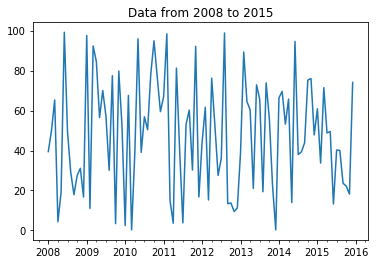

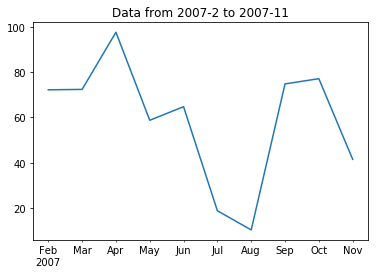

In [4]:
# 提取给定起始年份和终止年份之间的数据
start = '2008'
end = '2015'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)
# 提取给定月份范围内的切分数据
start = '2007-2'
end = '2007-11'
plt.figure()
data_timeseries[start:end].plot()
plt.title('Data from ' + start + ' to ' + end)

plt.show()

## 操作时间序列数据

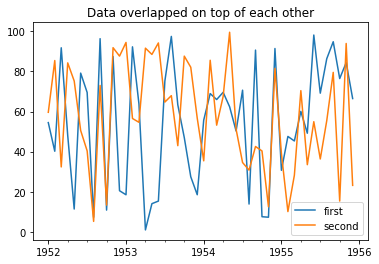

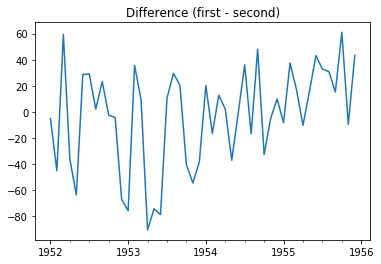

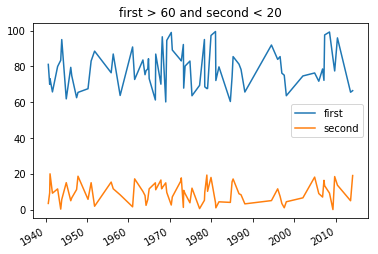

In [5]:
# 将用到第三列和第四列的数据
data1 = convert_data_to_timeseries(input_file, 2)
data2 = convert_data_to_timeseries(input_file, 3)
# 将数据转化为pandas的数据帧
dataframe = pd.DataFrame({'first': data1, 'second': data2})
# 画出给定年份范围内的数据
dataframe['1952':'1955'].plot()
plt.title('Data overlapped on top of each other')
# 画出两种数据的不同
plt.figure()
difference = dataframe['1952':'1955']['first'] - dataframe['1952':'1955']['second']
difference.plot()
plt.title('Difference (first - second)')
# 如果希望对第一列和第二列用不同的条件来过滤数据，可以指定这些条件并将其画出
dataframe[(dataframe['first'] > 60) & (dataframe['second'] < 20)].plot()
plt.title('first > 60 and second < 20')

plt.show()

## 从时间序列数据中提取统计数字

In [9]:
print('\nMaximum:\n', dataframe.max())
print('\nMinimum:\n', dataframe.min())

print('\nMean:\n', dataframe.mean())
print('\nMean row-wise:\n', dataframe.mean(1)[:10]) # 每行的均值

# 滑动均值是指计算一个窗口范围内的信号均值，并不断地移动时间窗
# temp = dataframe.rolling_mean(window=24)
# temp.plot()

# 相关系数
print('\nCorrelation coefficients:\n', dataframe.corr())

# 画出滑动相关性
# plt.figure()
# pd.rolling_corr(dataframe['first'], dataframe['second'], window=60).plot()

plt.show()


Maximum:
 first     99.82
second    99.97
dtype: float64

Minimum:
 first     0.07
second    0.00
dtype: float64

Mean:
 first     51.264529
second    49.695417
dtype: float64

Mean row-wise:
 1940-01-31    81.885
1940-02-29    41.135
1940-03-31    10.305
1940-04-30    83.545
1940-05-31    18.395
1940-06-30    16.695
1940-07-31    86.875
1940-08-31    42.255
1940-09-30    55.880
1940-10-31    34.720
Freq: M, dtype: float64

Correlation coefficients:
            first    second
first   1.000000  0.077607
second  0.077607  1.000000
